# Group 40 Project Proposal

***
Oliver and Kristen's section
***

## Introduction

Begin by providing some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal.

Clearly state the question you will try to answer with your project. Your question should involve one or more random variables of interest, spread across two or more categories that are interesting to compare. For example, you could consider the annual maxima river flow at two different locations along a river, or perhaps gender diversity at different universities. Of the response variable, identify one location parameter (mean, median, quantile, etc.) and one scale parameter (standard deviation, inter-quartile range, etc.) that would be useful in answering your question. Justify your choices.

UPDATE (Mar 1, 2022): If it doesn’t make sense to infer a scale parameter, you can choose another parameter, or choose a second variable altogether. Ultimately, we’re looking for a comprehensive inference analysis on one parameter spread across 2+ groups (with at least one hypothesis test), plus a bit more (such as an investigation on the variance, a quantile, or a different variable). In total, you should use both bootstrapping and asymptotics somewhere in your report at least once each. Also, your hypothesis test(s) need not be significant: it is perfectly fine to write a report claiming no significant findings (i.e. your p-value is large).

Identify and describe the dataset that will be used to answer the question. Remember, this dataset is allowed to contain more variables than you need – feel free to drop them!

Also, be sure to frame your question/objectives in terms of what is already known in the literature. Be sure to include at least two scientific publications that can help frame your study (you will need to include these in the References section). We have no specific citation style requirements, but be consistent.


The gender pay gap is the difference between wages earned by men and women. The disparity has long been reported (Maloney 2016). The Equal Pay Act was signed by President John F.Kennedy in 1963 (cite) and it mandates that women should receive equal pay for doing "substantially equal" work. Over the last 50 years, numerous laws and legislation have been passed in hope to deminish the disparity. However, Statistic Canada reported that female employees in Ontario earned $0.75 for every dollars earned by men in 2020(Statistics Canada data from the Canadian Income Survey). In this report, we would confirm whether women are earning less than men. We will compare mean of income and standard deviation between men and women. To achieve this, we used a dataset genereated by scraping of Glassdoor. It contains income for various job titles based on gender. 



**Dataset**:
* Found using <a href="https://www.kaggle.com/datasets/nilimajauhari/glassdoor-analyze-gender-pay-gap" target="_blank">this link</a> 

* Dataset is scraped from <a href="https://www.glassdoor.com/" target="_blank">Glassdoor website</a> 


## Preliminary Results
Demonstrate that the dataset can be read from the web into R.

Clean and wrangle your data into a tidy format.

Plot the relevant raw data, tailoring your plot in a way that addresses your question.

Compute estimates of the parameter you identified across your groups. Present this in a table. If relevant, include these estimates in your plot.

In [28]:
#library needed for this project
library(tidyverse)
library(dplyr)
library(RColorBrewer)
library(tidyr)
library(tidymodels)
library(repr)
library(cowplot)
options(repr.matrix.max.rows = 6)
library(broom)
library(digest)
library(infer)
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Load data into Jupyter notebook

In [20]:
df <- read_csv("https://raw.githubusercontent.com/kristennli/stat201/main/glassdoor.csv")

Rows: 1000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): JobTitle, Gender, Education, Dept
dbl (5): Age, PerfEval, Seniority, BasePay, Bonus

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The features of the data set are:
* Job Title
* Gender
* Age: age in years
* PerfEval: performance evaluation score
* Education: level of education
* Dept: department
* Seniority: Seniority (No of years worked)
* Base Pay: Annual Basic Pay in USD
* Bonus: Annual Bonus Pay in USD

In [22]:
summary(df)

   JobTitle            Gender               Age           PerfEval    
 Length:1000        Length:1000        Min.   :18.00   Min.   :1.000  
 Class :character   Class :character   1st Qu.:29.00   1st Qu.:2.000  
 Mode  :character   Mode  :character   Median :41.00   Median :3.000  
                                       Mean   :41.39   Mean   :3.037  
                                       3rd Qu.:54.25   3rd Qu.:4.000  
                                       Max.   :65.00   Max.   :5.000  
  Education             Dept             Seniority        BasePay      
 Length:1000        Length:1000        Min.   :1.000   Min.   : 34208  
 Class :character   Class :character   1st Qu.:2.000   1st Qu.: 76850  
 Mode  :character   Mode  :character   Median :3.000   Median : 93328  
                                       Mean   :2.971   Mean   : 94473  
                                       3rd Qu.:4.000   3rd Qu.:111558  
                                       Max.   :5.000   Max.   :179726  

In [55]:
# check for missing values
sum(is.na(df))

[1] 0

No missing values in dataset.

### EDA

We first investigate the distribution of different features between men and women to verify if the population is a normal distribution.

In [25]:
head(df)

JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Graphic Designer,Female,18,5,College,Operations,2,42363,9938
Software Engineer,Male,21,5,College,Management,5,108476,11128
Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
IT,Female,20,5,PhD,Operations,4,70890,10126


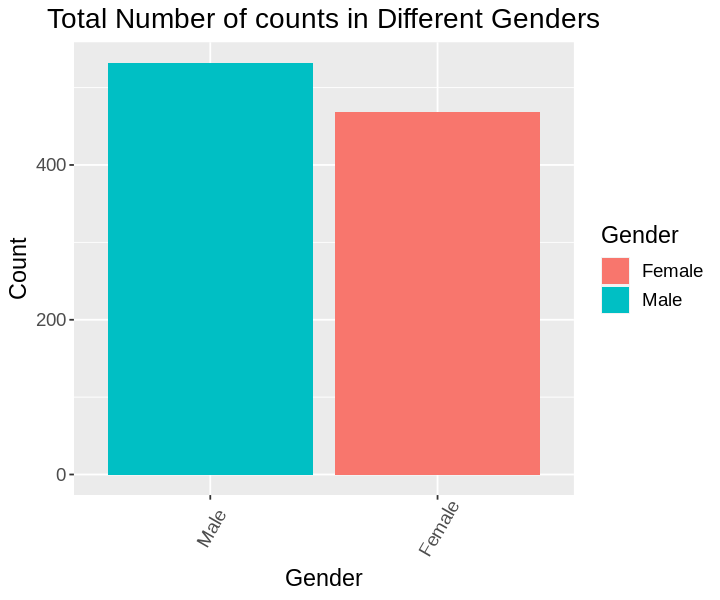

In [58]:
options(repr.plot.width = 6, repr.plot.height = 5)

# check class imbalance - 
gender_pop <- df %>%
    group_by(Gender) %>%
    summarise(n=n())%>%
    arrange(desc(n))

gender_pop <- gender_pop%>%
  ggplot(aes(x = reorder(Gender, -n), y = n, fill = Gender))+
  geom_bar(stat = 'identity')+
  labs(x = "Gender",
       y = "Count", 
       fill = "Gender",
       title = "Total Number of counts in Different Genders")+
  scale_color_brewer(palette = "Set3")+
  theme(axis.text.x = element_text(angle = 60, vjust = 0.6, hjust=0.5), 
        text = element_text(size = 14))+
  theme(plot.title = element_text(hjust = 0.5))


gender_pop

`summarise()` has grouped output by 'Gender'. You can override using the
`.groups` argument.


Gender,JobTitle,n
<chr>,<chr>,<int>
Female,Data Scientist,53
Female,Driver,46
Female,Financial Analyst,49
⋮,⋮,⋮
Male,Sales Associate,51
Male,Software Engineer,101
Male,Warehouse Associate,44


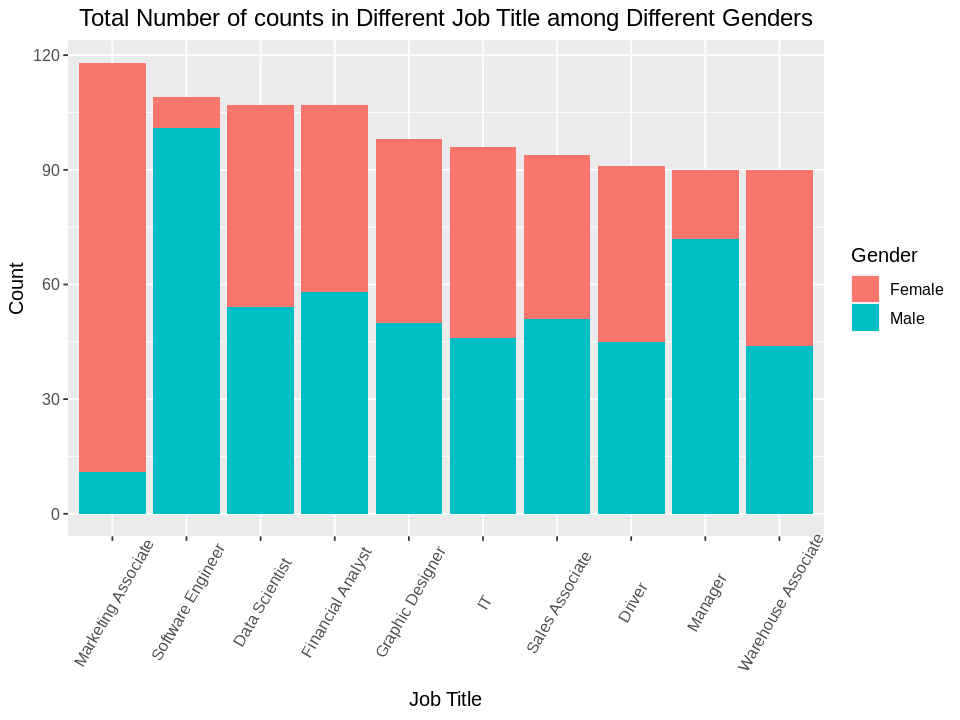

In [50]:
# Job title distribution
title <- df %>%
    group_by(Gender,JobTitle) %>%
    # select(JobTitle) %>%
    summarise(n=n())
title

title_dist <- title %>%
    ggplot(aes(x = reorder(JobTitle, -n), y = n, fill = Gender))+
  geom_bar(stat = 'identity')+
  labs(x = "Job Title",
       y = "Count", 
       fill = "Gender",
       title = "Total Number of counts in Different Job Title among Different Genders")+
  scale_color_brewer(palette = "Set3")+
  theme(axis.text.x = element_text(angle = 60, vjust = 0.6, hjust=0.5), 
        text = element_text(size = 12))+
  theme(plot.title = element_text(hjust = 0.5))

title_dist

The job title distribution of male and female shows that there is imbalance in certain fields, namely Software Markerting Associate, Enginneer and Manager. There is over-representation of women in the marketing associate positions. Conversely, there are more men who work as software engineers or hold managerial positions in this dataset.

`summarise()` has grouped output by 'Gender'. You can override using the
`.groups` argument.


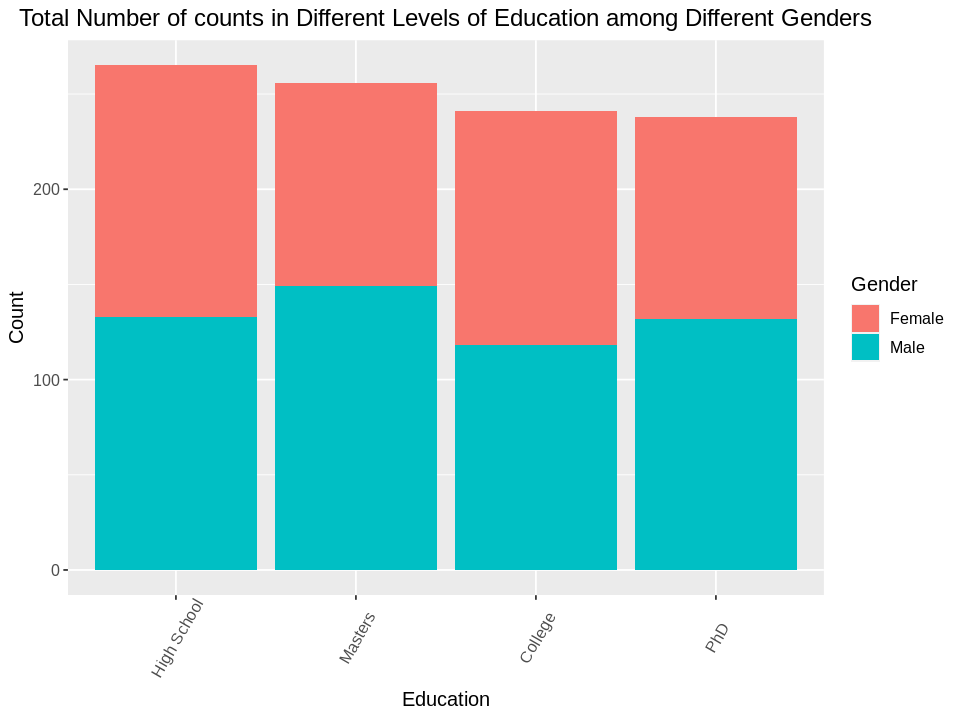

In [54]:
# Education distribution
education <- df %>%
    group_by(Gender,Education) %>%
    summarise(n=n())


education_dist <- education %>%
    ggplot(aes(x = reorder(Education, -n), y = n, fill = Gender))+
  geom_bar(stat = 'identity')+
  labs(x = "Education",
       y = "Count", 
       fill = "Gender",
       title = "Total Number of counts in Different Levels of Education among Different Genders")+
  scale_color_brewer(palette = "Set3")+
  theme(axis.text.x = element_text(angle = 60, vjust = 0.6, hjust=0.5), 
        text = element_text(size = 12))+
  theme(plot.title = element_text(hjust = 0.5))

education_dist

The education distribution shows that females and males are balanced among the four different levels of education within this dataset.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



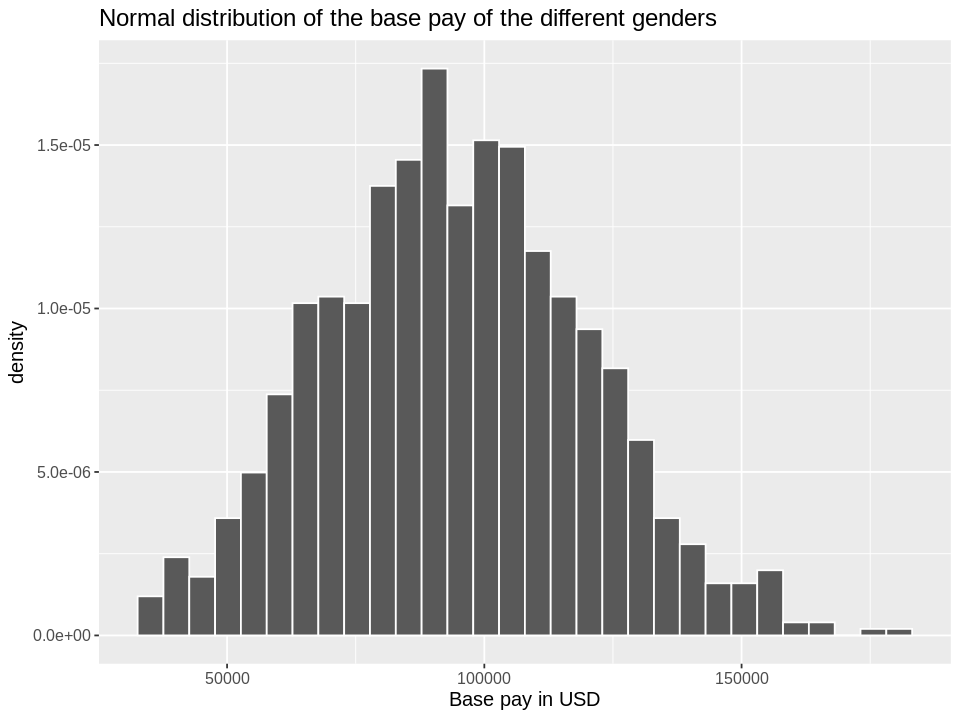

In [52]:
# wage distribution - appear to be Normal distribution
wage_plot <- df %>%  
    ggplot() +
    geom_histogram(aes(BasePay, y = ..density..), color = 'white') +
    ggtitle("Normal distribution of the base pay of the different genders") +
    xlab("Base pay in USD")+
    theme(text = element_text(size = 12))

wage_plot

The base pay appears to be symmetrical, bell-shaped and unimodal. The BasePay is a standard Normal distribution.

### Feature engineering (need discussion)
Add base pay and bonus and generate a new column called "income", this represents the annual income. Could reflect on how an individual preforms at their jobs. Possible positive correlation: preform better, earn more bonus?

***
Ayuho and Jennifer's section
***

## Methods: Plan

The previous sections will carry over to your final report (you’ll be allowed to improve them based on feedback you get). Begin this Methods section with a brief description of “the good things” about this report – specifically, in what ways is this report trustworthy?

Continue by explaining why the plot(s) and estimates that you produced are not enough to give to a stakeholder, and what you should provide in addition to address this gap. Make sure your plans include at least one hypothesis test and one confidence interval. If possible, compare both the bootstrapping and asymptotics methods.

Finish this section by reflecting on how your final report might play out:

What do you expect to find?

What impact could such findings have?

What future questions could this lead to?


## References
At least two citations of literature relevant to the project. The citation format is your choice – just be consistent. Make sure to cite the source of your data as well.

Maloney, Carolyn B. (April 2016). "Gender Pay Inequity: Consequences for Women, Families and the Economy" (PDF). Joint Economic Committee.
